# Part I - Ford GoBike System Data
## by Abdulelah Aljaloud

## Introduction


This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. On June 28, 2017, the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels on June 11, 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
181485,422,2019-02-01 09:10:06.0250,2019-02-01 09:17:08.2300,321.0,5th St at Folsom,37.780146,-122.403071,81.0,Berry St at 4th St,37.775880,-122.393170,74,Subscriber,1986.0,Male,No
100538,746,2019-02-14 18:11:35.7060,2019-02-14 18:24:02.6100,364.0,China Basin St at 3rd St,37.772000,-122.389970,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,1602,Subscriber,1989.0,Male,No
37078,4255,2019-02-23 13:46:16.2240,2019-02-23 14:57:11.6510,323.0,Broadway at Kearny,37.798014,-122.405950,72.0,Page St at Scott St,37.772406,-122.435650,4991,Subscriber,1995.0,Other,Yes
55752,1426,2019-02-21 09:24:19.2120,2019-02-21 09:48:05.2660,132.0,24th St at Chattanooga St,37.751819,-122.426614,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1024,Subscriber,1988.0,Male,No
78864,313,2019-02-18 18:32:03.4660,2019-02-18 18:37:16.7800,77.0,11th St at Natoma St,37.773507,-122.416040,368.0,Myrtle St at Polk St,37.785434,-122.419622,5021,Subscriber,1987.0,Male,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
#counting if there is any duplicated data
df.duplicated().sum()

0

In [5]:
#counting values that are NaN
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#removing rows that does not have gender value and station id
df = df[df['member_gender'].isnull() == False]

In [7]:
df = df[df['start_station_id'].isnull() == False]

In [8]:
#changing start_time and end_time datatype to be datetime
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')
df.bike_id = df.bike_id.astype('str')

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.member_birth_year = df.member_birth_year.astype('int')

In [9]:
#creating new column for age
df['start_year'] = pd.DatetimeIndex(df['start_time']).year
df['age'] = df['start_year'] - df['member_birth_year']
#creating new columns for duration in minute, hour, day, week, month, from 'start_time' 
df['start_date'] = df['start_time'].dt.strftime('%Y-%m-%d')
df['start_time_month'] = df['start_time'].dt.strftime('%B')
df['start_dayofweek'] = df['start_time'].dt.strftime('%A')
df['start_time_day'] = df['start_time'].dt.day
df['start_time_hour'] = df['start_time'].dt.hour
df['duration_min'] = df['duration_sec'] / 60

In [10]:
#creating new column for age groups  from 'age' 
df['age_group'] = df['age'].apply(lambda x: '10 - 19' if 10<=x<20
                                                  else '20 - 29' if 20<=x<30
                                                  else '30 - 39' if 30<=x<40
                                                  else '40 - 49' if 40<=x<50
                                                  else '50 - 59' if 50<=x<60
                                                  else '60 - 100' if 60<=x<=141
                                                  else x)

In [11]:
df.age_group.value_counts()

30 - 39     69019
20 - 29     63591
40 - 49     24366
50 - 59     12113
60 - 100     4154
10 - 19      1709
Name: age_group, dtype: int64

In [12]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_year,age,start_date,start_time_month,start_dayofweek,start_time_day,start_time_hour,duration_min,age_group
110963,747,2019-02-12 17:28:16.298,2019-02-12 17:40:43.774,321.0,5th St at Folsom,37.780146,-122.403071,10.0,Washington St at Kearny St,37.795393,...,No,2019,27,2019-02-12,February,Tuesday,12,17,12.450000,20 - 29
163485,819,2019-02-05 09:09:36.073,2019-02-05 09:23:15.579,81.0,Berry St at 4th St,37.775880,-122.393170,8.0,The Embarcadero at Vallejo St,37.799953,...,No,2019,38,2019-02-05,February,Tuesday,5,9,13.650000,30 - 39
84151,164,2019-02-17 18:46:24.510,2019-02-17 18:49:09.012,245.0,Downtown Berkeley BART,37.870139,-122.268422,258.0,University Ave at Oxford St,37.872355,...,Yes,2019,20,2019-02-17,February,Sunday,17,18,2.733333,20 - 29
93412,895,2019-02-15 17:34:27.159,2019-02-15 17:49:22.841,25.0,Howard St at 2nd St,37.787522,-122.397405,60.0,8th St at Ringold St,37.774520,...,No,2019,40,2019-02-15,February,Friday,15,17,14.916667,40 - 49
156403,469,2019-02-06 07:57:49.126,2019-02-06 08:05:38.847,349.0,Howard St at Mary St,37.781010,-122.405666,102.0,Irwin St at 8th St,37.766883,...,No,2019,31,2019-02-06,February,Wednesday,6,7,7.816667,30 - 39


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
start_year                 174952 non-null int64
age               

In [14]:
df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

### What is the structure of your dataset?

> The FordGoBike data contains trip records with 16 variables which are: { duration_sec,	start_time,	end_time,	start_station_id,	start_station_name,	start_station_latitude,	start_station_longitude,	end_station_id,	end_station_name,	end_station_latitude,	end_station_longitude,	bike_id,	user_type,	member_birth_year,	member_gender,	bike_share_for_all_trip }

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in exploring and investigating the riding duration and riding distance and figuring some patterns in the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Investigate in some member's information like Gender, Age and user_type(Costumer and Subscriber). and investigating in Start time and each of the durations.

## Univariate Exploration


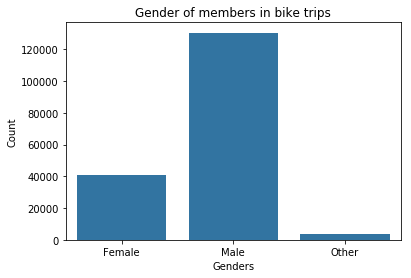

In [15]:
color1 = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = color1)
plt.title('Gender of members in bike trips')
plt.xlabel('Genders')
plt.ylabel('Count');

#### Most of the bike riders in this dataframe are Males, three time the number of Females.

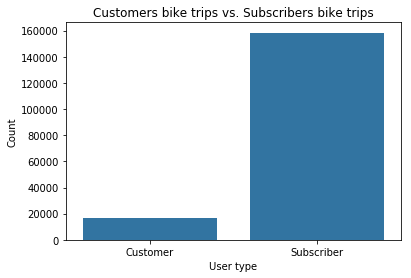

In [16]:
sb.countplot(data = df, x = 'user_type', color = color1)
plt.title('Customers bike trips vs. Subscribers bike trips')
plt.xlabel('User type')
plt.ylabel('Count');

#### We can tell that Subscribers are immensely larger than Customers.

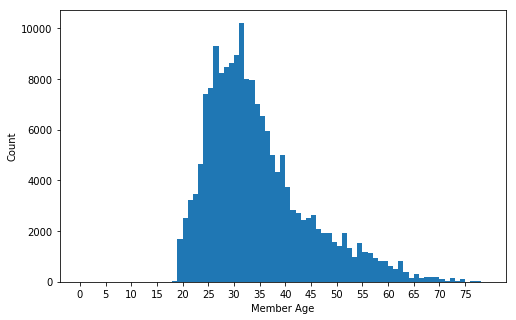

In [17]:
plt.figure(figsize=[8,5])
bins = np.arange(0, 80, 1) #To remove outliers
ticks = np.arange(0, 80, 5)
#age80 = df.query('age <= 80') #filtering outliers that are above 80
#bins = np.arange(0, age80['age'].max()+5, 5)
plt.hist(data=df, x='age', bins=bins);
plt.xticks(ticks);
plt.xlabel('Member Age');
plt.ylabel('Count');

#### This graph tell us that most of the members are around 24-40 years old, and peaks at 30. and the bike usage is dropping significantly as the person gets older in age.

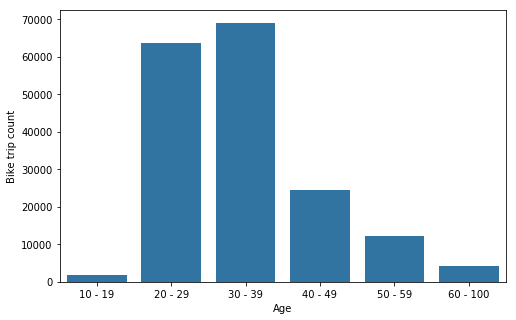

In [18]:
ageorder=['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 100']
plt.figure(figsize=[8,5])
sb.countplot(data = df, x = 'age_group', color = color1, order = ageorder)
plt.xlabel('Age')
plt.ylabel('Bike trip count');

#### This graph tells us that the majority of bikers are around 20-39, and the teeenagers are the least group in this dataframe.

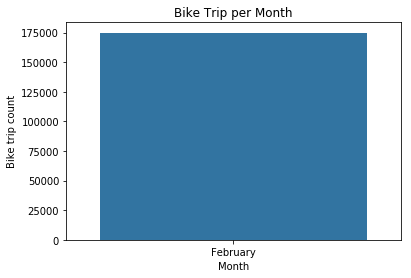

In [19]:
sb.countplot(data = df, x = 'start_time_month', color = color1)
plt.title('Bike Trip per Month')
plt.xlabel('Month')
plt.ylabel('Bike trip count');

#### We can notice that our dataset has colected data in February month only. 

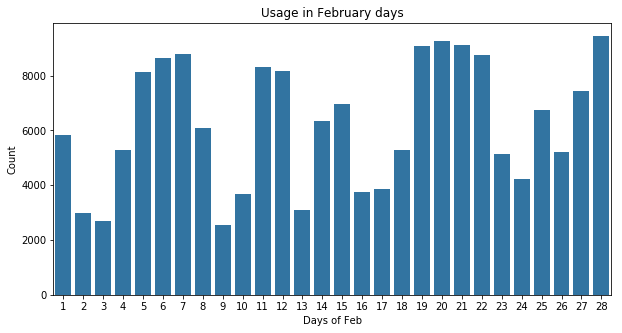

In [20]:
plt.figure(figsize=[10,5])
sb.countplot(data= df, x='start_time_day', color = color1)

plt.xlabel('Days of Feb')
plt.ylabel('Count')
plt.title('Usage in February days');

#### This graph shows that  the day 28 is the day of month with the most bike trips, and the day 28-2-2019 of the week was Thursday.

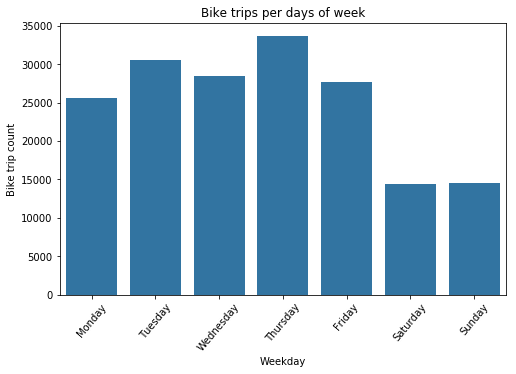

In [21]:
daysorder=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[8,5])
sb.countplot(data = df, x = 'start_dayofweek', color = color1, order = daysorder)
plt.title('Bike trips per days of week')
plt.xlabel('Weekday')
plt.ylabel('Bike trip count');
plt.xticks(rotation=50);

#### This graph tells us that Thursday is the most common day to start, and we can also notice that Sunday and Saturday (which are weekend days) are the least common day to start.

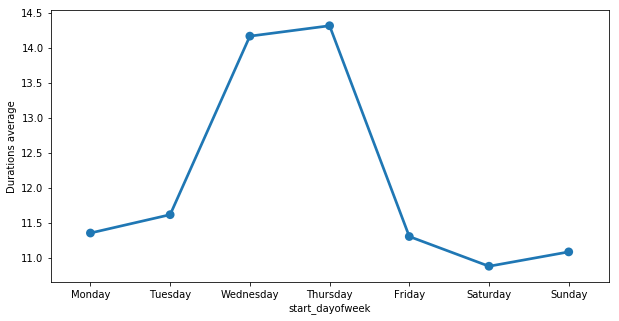

In [22]:
weekmintavg = df.groupby('start_dayofweek').duration_min.mean()

plt.figure(figsize=[10,5])
sb.pointplot(x=weekmintavg.index, y=weekmintavg)
plt.xticks(np.arange(0,7), daysorder)
plt.ylabel('Durations average' );

#### The graph shows us that Wednesday and Thursday bike rides lasted longer than rest of the days.

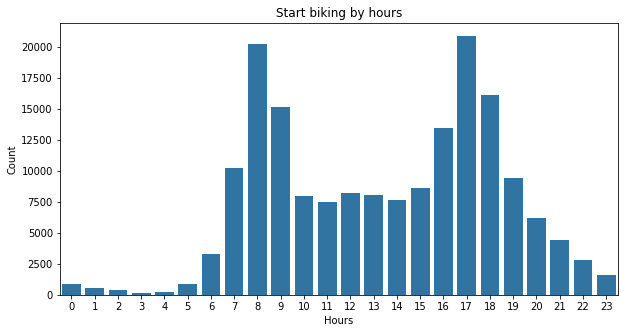

In [23]:
plt.figure(figsize=[10,5])
sb.countplot(data= df, x= 'start_time_hour', color= color1)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Start biking by hours');

#### We can notice that 8:00AM and 5:00PM are the most common times. which are the time that most people go to work and the time to return home.

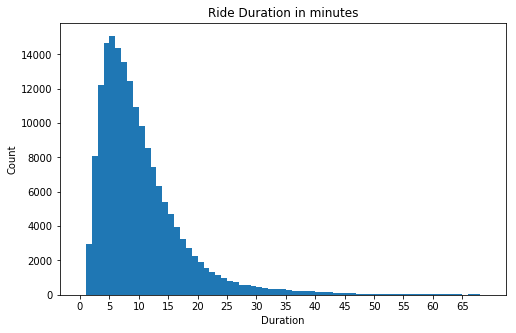

In [24]:
plt.figure(figsize=[8,5])
bins = np.arange(0, 70, 1) #To remove outliers
ticks = np.arange(0, 70, 5)
plt.hist(data= df, x= 'duration_min', bins= bins);
plt.xticks(ticks);
plt.ylabel('Count')
plt.xlabel('Duration')
plt.title('Ride Duration in minutes');

#### We can notice that the average duration is under 15 minutes, and most of rides are between 4-10 minutes range.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Males are three time larger than Females in this dataframe.

- Subscribers are immensely larger than Customers in total.¶

- Most of the members are around 24-40 years old, and peaks at 30, and the bike usage is dropping significantly as the person gets older in age.

- Majority of bikers are around 20-39, and the teeenagers are the least group in this dataframe.

- This dataset colected data in February month only.

- 28/2/2019 is the day with the most bike trips.

- Thursday is the most common day to start, Sunday and Saturday are the least.

- Wednesday and Thursday bike rides lasted longer than rest of the days.

- 8:00AM and 5:00PM are the most common times.

- Most of rides are between 4-10 minutes range.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I made a new columns to specifiy some values from the date like start time of month, week, day, hour, minutes and create a column for the age from the member birth year column.

> In age_group I found that that 60-69, 70-79, 80-89, 90-100...etc ranges represents a small number of rides, so I just make them in one group, and I also excluded extreme values that are above 100 years.

## Bivariate Exploration




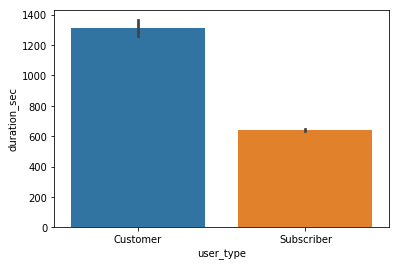

In [25]:
sb.barplot(data=df, x='user_type', y='duration_sec')

This graph tells us that customers spends more time in total, double the time of subscribers, even though that contomers count are immensely larger than subscribers but the deference in duration is just the double.

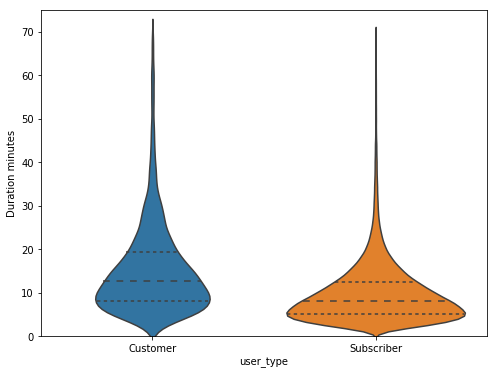

In [26]:
plt.figure(figsize=[8,6])
ax = plt.gca()
ax.set_ylim([0, 75])
df = df.query('duration_min <= 70', ) #to delete a disturbing outlier
sb.violinplot(data= df, x='user_type', y='duration_min', inner='quartile');
plt.ylabel('Duration minutes');

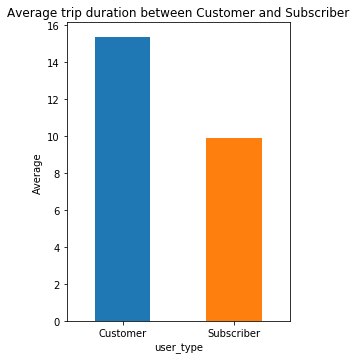

In [27]:
plt.figure(figsize=[4,5.5])
averagedur = df.groupby('user_type')['duration_min'].mean().plot(kind='bar')
plt.ylabel('Average');
plt.title('Average trip duration between Customer and Subscriber');
plt.xticks(rotation=0);

The two graphs above tells us that Customers average trip duration is 15 minutes, and the Subscribers average trip duration is 10 minutes.

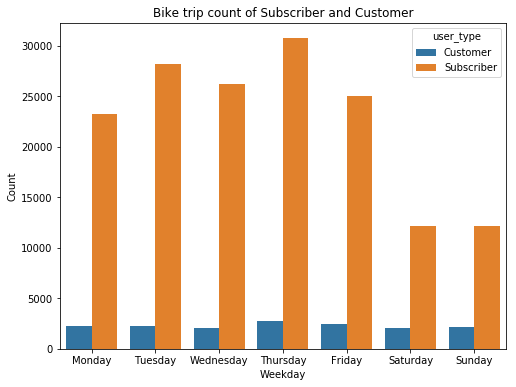

In [28]:
plt.figure(figsize=[8,6])
sb.countplot(data= df, x= 'start_dayofweek', hue= 'user_type', order= daysorder);
plt.xlabel('Weekday');
plt.ylabel('Count');
plt.title('Bike trip count of Subscriber and Customer');

We can notice that Subscribers use bikes on weekdays more than on weekends which can tell us that most subscribers are using it for work.

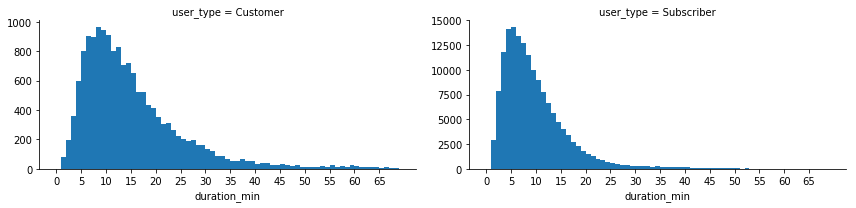

In [29]:
#using faceting for duration_min of customers and subscribers histogram
bin = np.arange(0, 70, 1)
g = sb.FacetGrid(data = df, col = 'user_type', aspect=2, sharey=False)
g.map(plt.hist, 'duration_min', bins = bin)
ticks = np.arange(0, 70, 5)
plt.xticks(ticks, ticks);

The graph shows that most of customers are riding between 8-12 minutes, and most subscribers rode between 5-10 minutes.

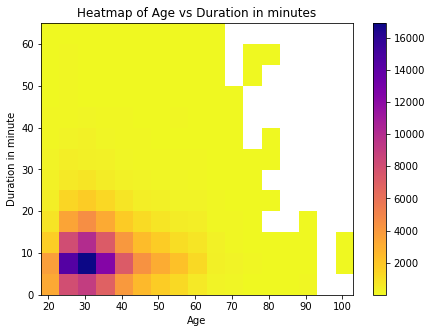

In [30]:
plt.figure(figsize = [7,5])
xbin = np.arange(df['age'].min(), 105, 5)
ybin = np.arange(0, df['duration_min'].max(), 5)
plt.hist2d(data = df, x = 'age', y='duration_min', cmin=0.5, cmap = 'plasma_r', bins=[xbin, ybin]);
plt.xlabel('Age');
plt.ylabel('Duration in minute');
plt.colorbar();
plt.title('Heatmap of Age vs Duration in minutes');

This heatmap shows us that there is a high density in the area of riders with an age between 25-35 and their duration of riding is between 5-15 minutes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Customers spends more time in total, double the time of subscribers, even though that contomers count are immensely larger than subscribers but the deference in duration is just the double.

- Subscribers use bikes on weekdays more than on weekends which can tell us that most subscribers are using it for work.

- Most of customers are riding between 8-12 minutes, and most subscribers rode between 5-10 minutes.

- A lot of riders with an age between 25-35 thier riding duration is between 5-15 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Thursday has the most Customers bikers compared to other days. It also has the most Subscribers bikers compared to other days.

> I have noticed that Customers take more duration times compared to Subscribers, if you see the duration from 30 to 65 you will notice that Customers have more values in this range.

## Multivariate Exploration



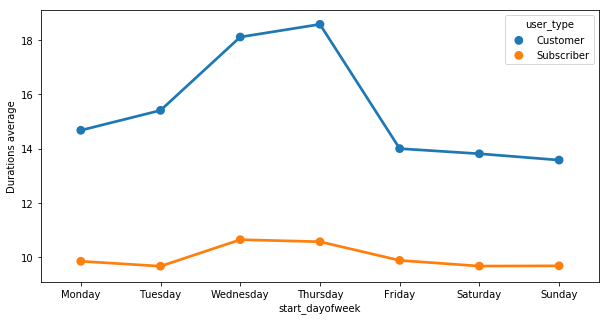

In [31]:
weekmintavgUser = df.groupby(['user_type','start_dayofweek']).duration_min.mean()
weekmintavgUser= weekmintavgUser.reset_index()
plt.figure(figsize=[10,5])
sb.pointplot(data = weekmintavgUser, x= 'start_dayofweek', y= 'duration_min', hue='user_type')
plt.ylabel('Durations average')
plt.xticks(np.arange(0,7), daysorder);

#### This graph shows us that the customers bike-riding duration lasted longer than subscribers in every day at least +2

In [32]:
def hist2d(x, y, color = 'plasma_r'):
    xbin = np.arange(df['age'].min(), 60, 2)
    ybin = np.arange(0, 45, 2)
    plt.hist2d(x, y, cmin=0.5, cmap = 'plasma_r', bins=[xbin, ybin]);

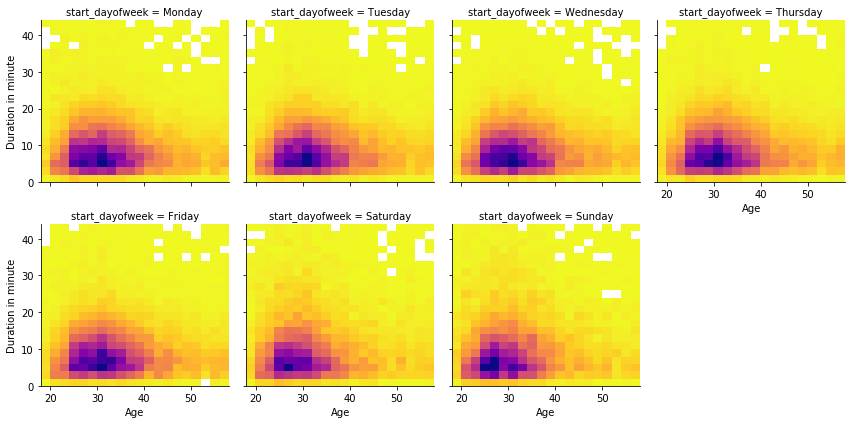

In [33]:
gridWeek = sb.FacetGrid(data = df, col = 'start_dayofweek', col_wrap = 4, col_order= daysorder);
gridWeek.map(hist2d, 'age', 'duration_min');
gridWeek.set_xlabels('Age');
gridWeek.set_ylabels('Duration in minute');

#### This graph shows us that young riders have a longer trip in Friday.

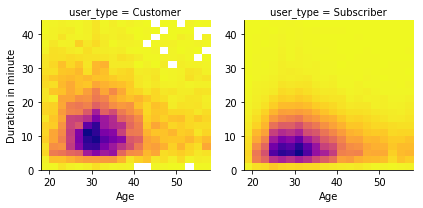

In [34]:
gridType = sb.FacetGrid(data = df, col = 'user_type');
gridType.map(hist2d, 'age', 'duration_min');
gridType.set_xlabels('Age');
gridType.set_ylabels('Duration in minute');

#### This graph shows us that the Customers bike slightly longer than Subscribers.

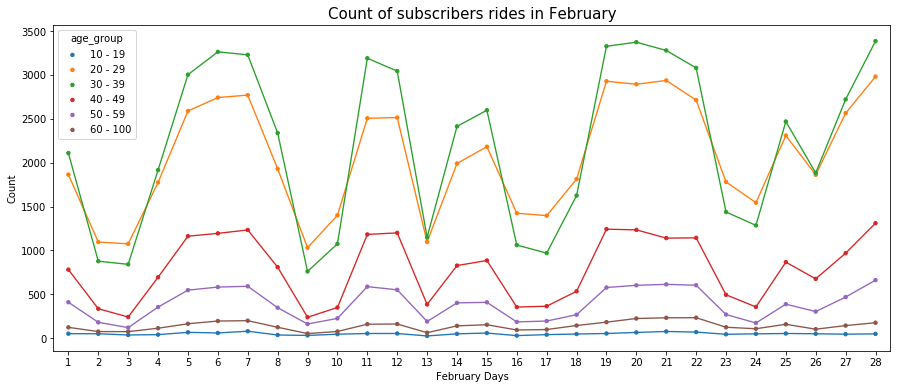

In [37]:
ageSub = df[df['user_type']=='Subscriber'].groupby(['start_time_day', 'age_group'])
plt.figure(figsize=(15,6))
ageSub= ageSub.agg({'bike_id':'count'}).reset_index()
axis = sb.pointplot(data= ageSub, x= 'start_time_day', y= 'bike_id', hue= 'age_group', scale=0.5)
plt.xlabel('February Days')
plt.ylabel('Count')
plt.title('Count of subscribers rides in February', fontsize= 15);

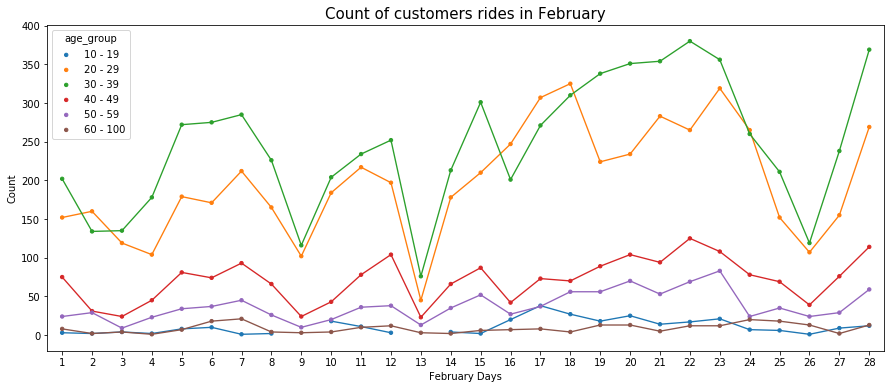

In [38]:
ageCus = df[df['user_type']=='Customer'].groupby(['start_time_day', 'age_group'])
plt.figure(figsize=(15,6))
ageCus= ageCus.agg({'bike_id':'count'}).reset_index()
axis = sb.pointplot(data= ageCus, x ='start_time_day', y= 'bike_id', hue= 'age_group', scale=0.5)
plt.xlabel('February Days')
plt.ylabel('Count');
plt.title('Count of customers rides in February', fontsize= 15);

#### From the two graphs above we notice that 30-39 group is the most consistently bike-riders in each day.

#### 20-29 group comes as second, and some days 20-29 group surpassed 30-39.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The features we investigated here are pretty much indenpendant from each other. We did not observed features that strengthened each other in terms of looking at features to my interest.

> Customers bike-riding duration lasted longer than Subscribers in every day.

> Heatmaps:
- Young riders have a longer trips in Friday.
- Customers bike slightly longer than Subscribers.

> Pointplot:
- 30-39 age group is the most consistently bike-riders in each day
- 20-29 group comes as second, and some days 20-29 group surpassed 30-39.
- 13-02-2019 the customers count had a massive drop.

### Were there any interesting or surprising interactions between features?

> I surprised when I saw that the trip duration for Customers lasted longer period of time than the Subscribers, because I thought it was the opposite, and one thing that the difference between male and female is not obvious in this the analysis, and I think it baybe because of the huge gap in records.